## **Unveiling Book Trends**

This project explores the [Goodreads-10k dataset](https://github.com/zygmuntz/goodbooks-10k/raw/master/books.csv) to understand book popularity, publishing trends, and user preferences. We use Python's pandas library to analyze average ratings, genres, publication years, and book tags. This data narrative will provide insights for authors, publishers, and recommendation platforms. <br>

**Our Goals:**
- Uncover insights into book popularity and user preferences based on average rating and genre.
- Analyze publishing trends across different historical periods.
- Identify potential relationships between book categories and average ratings.
- Explore the role of tags in user interest and discoverability.

---

Number of books published by the year 2000-2010 is higher than the year 1990-2000.

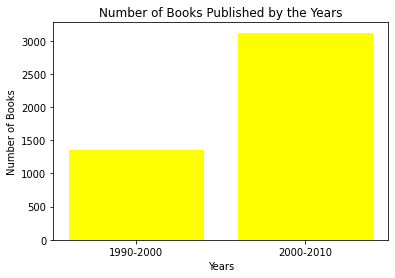

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

book= pd.read_csv("https://github.com/zygmuntz/goodbooks-10k/raw/master/books.csv")

year_1 = ((book["original_publication_year"] >= 1990) & (book["original_publication_year"] < 2000)).sum()
year_2= ((book["original_publication_year"] >= 2000) & (book["original_publication_year"] < 2010)).sum()

plt.bar(['1990-2000', '2000-2010'],[year_1, year_2],color="yellow")
plt.title('Number of Books Published by the Years')
plt.xlabel("Years")
plt.ylabel("Number of Books")
plt.show()

---

Top 5 Authors with the Most Books with a Rating of 4 or Higher in the Fantasy Genre

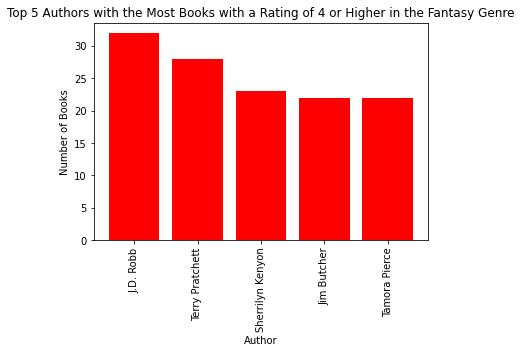

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#to read the csv
rating= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
book= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
book_tag= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')
tags= pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv')

book_ratings = rating.groupby('book_id')['rating'].mean()
books_with_ratings = pd.merge(book, book_ratings, on='book_id')
book_tag_rating= pd.merge(books_with_ratings, book_tag)
book_tag_rating = pd.merge(book_tag_rating, tags, on='tag_id')

#finding the genre and rating
genre= book_tag_rating[(book_tag_rating['tag_name'] == 'fantasy') & (book_tag_rating['rating'] >= 4)]

#finding top 5 authors
author_ratings = genre.groupby('authors')['book_id'].nunique()
top_author = author_ratings.sort_values(ascending=False)
top_5_author=top_author[:5]

#plotting the graph
plt.bar(top_5_author.index,top_5_author.values,color="r")
plt.xlabel("Author")
plt.xticks(rotation=90)
plt.ylabel("Number of Books")
plt.title("Top 5 Authors with the Most Books with a Rating of 4 or Higher in the Fantasy Genre")
plt.show()

---

What is the probability that a book by J.K. Rowling has a rating greater than or equal to 4.0?

Probability of a book by J.K. Rowling having rating greater than or equal to 4:  0.875


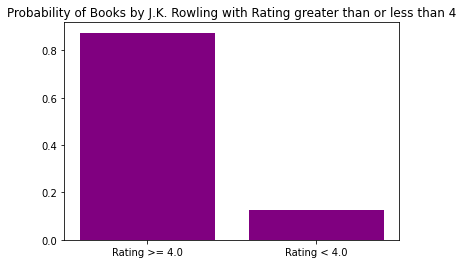

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

books=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')

rowling_books=books[books['authors'] == 'J.K. Rowling']
rating=rowling_books[rowling_books['average_rating'] >= 4.0]
probability=len(rating)/len(rowling_books)

print('Probability of a book by J.K. Rowling having rating greater than or equal to 4: ', probability)
plt.bar(['Rating >= 4.0', 'Rating < 4.0'], [probability, 1-probability],color="purple")
plt.title('Probability of Books by J.K. Rowling with Rating greater than or less than 4')
plt.show()

---

Books with more work text reviews have a higher average rating than books with fewer text reviews

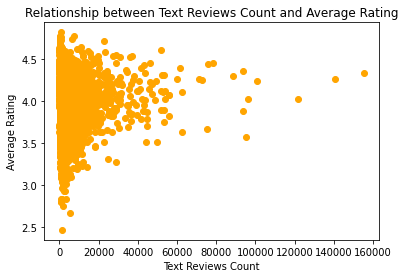

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

books_df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
plt.scatter(books_df['work_text_reviews_count'], books_df['average_rating'],c="orange")
plt.title('Relationship between Text Reviews Count and Average Rating')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')
plt.show()

---

Find the top 5 author who publish book in other language than english in the year 1993 to 2003

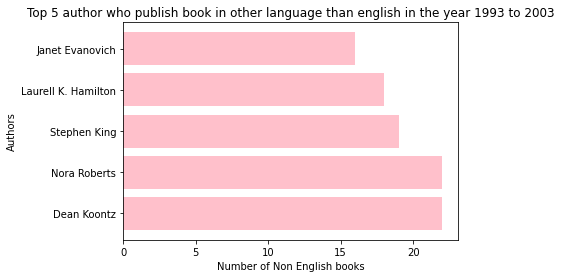

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

books=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')

books=books[(books['original_publication_year'] >= 1993) & (books['original_publication_year'] <= 2003)]
non_english_books= books_df[books_df['language_code'] != 'eng']
publisher_counts = non_english_books['authors'].value_counts()
top_publishers = publisher_counts[:5]

plt.barh(top_publishers.index,top_publishers.values,color="pink")
plt.ylabel("Authors")
plt.xlabel("Number of Non English books")
plt.title("Top 5 author who publish book in other language than english in the year 1993 to 2003")
plt.show()